# DNDS6013 Scientific Python: 4th Class
## Central European University, Winter 2019/2020

Instructor: Márton Pósfai, TA: Luis Natera Orozco

Emails: posfaim@ceu.edu, natera_luis@phd.ceu.edu



## Plan for today
* Continue with city data
* Dictionaries
* Numpy
* (Plotting with matplotlib)

Don't forget about our [slack channel](http://sp2020winter.slack.com).

#### But first, solving problems from last week

Solutions cannot be hidden:

<details><summary><u>Solution.</u></summary>
<p>
    
```python
    print('please, hide me!')
```
    
</p>
</details>

Problem: Microsoft's web browser does not support the html tag.<br>
Solution: Set default browser to Firefox

### International characters

In [24]:
guests = ["Kate","Peter", "Adam", "Jenny", "Zack", "Eva"]

guests.append('Ödön')

print(sorted(guests))

print()
#The problem
print("Zack">"Odon")
print("Zack">"Ödön")

['Adam', 'Eva', 'Jenny', 'Kate', 'Peter', 'Zack', 'Ödön']

True
False


In [111]:
import locale
#Issue was caused by:
#locale.resetlocale()
locale.getlocale()

('en_US', 'UTF-8')

In [26]:
locale.setlocale(locale.LC_ALL, ('hu_HU','UTF-8'))
print(locale.getlocale())

print(locale.strxfrm("Ödön"))
print(locale.strxfrm("Zack")>locale.strxfrm("Ödön"))

print()
print(sorted(guests, key=locale.strxfrm))

('hu_HU', 'UTF-8')
iSie"*"*			
True

['Adam', 'Eva', 'Jenny', 'Kate', 'Ödön', 'Peter', 'Zack']


## Last week's quiz

Lists are mutable

In [ ]:
a = [0,1,2]
b=a
c=a[:] #makes a copy, same as c=a.copy()
a[0]='hello'
print(b,c)

Using `if` statement within an expression

In [ ]:
a = 1 + (2 if 2==1+1 else 0)

## Analyzing city data

We will read a file containing data about Hungarian municipalities and calculate some things. First, copy `"Hun_cities.csv"` to the working directory:

In [110]:
%pwd

'/home/posfaim/Dropbox/teaching/scientific_python/2020'

In [3]:
cities = []
with open("Hun_cities.csv","r",encoding="utf-8") as f:
    for line in f:
        cities.append(line.rstrip().split(','))
print(cities[0])
print(cities[1])
print(len(cities))

['KSHKOD', '"TELNEV"', '"TELNEV CLEAR"', 'POP', 'SIZE_km2', 'latitude', 'longitude', 'SUBREG', 'SUBREGCENT', 'COUNTYCODE', 'COUNTYCENT', 'TOWN', 'REGION', 'UNIV']
['1357', '"Budapest"', '"Budapest"', '1740041', '52509', '47.506225', '19.06482', '3101', '1', '1', '1', '1', '1', '1']
2562


Convert coordinates from strings to numbers:

In [4]:
for c in cities[1:]:
    c[5]=float(c[5])
    c[6]=float(c[6])
print(cities[1])

['1357', '"Budapest"', '"Budapest"', '1740041', '52509', 47.506225, 19.06482, '3101', '1', '1', '1', '1', '1', '1']


Convert all columns to numbers, so later we don't have to worry about it:

In [7]:
for c in cities[1:]:
    for i in range(3,len(c)):
        c[i]=float(c[i])
print(cities[1])

['1357', '"Budapest"', '"Budapest"', 1740041.0, 52509.0, 47.506225, 19.06482, 3101.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Exercise from last week
Remove the double quotes from city names

<details><summary><u>Hint.</u></summary>
<p>
Iterate through the <code>cities</code> list and use the <code>strip()</code> method of strings to remove the double quotes.  
</p>
</details>

In [135]:
for c in cities:
    c[1] = c[1].replace('"', '')
    c[2] = c[2].replace('"', '')
print(cities[1])

['1357', 'Budapest', 'Budapest', 1740041.0, 52509.0, 47.506225, 19.06482, 3101.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<details><summary><u>Solution.</u></summary>
<p>
    
```python
for c in cities:
    c[1]=c[1].strip('"')
    c[2]=c[2].strip('"')
print(cities[5])
```
    
</p>
</details>

### Exercise

 * Print the top 10 most populus cities
 * Print the top 10 cities with the largest area
 * Print the smallest city with university
 * Print the top 10 cities with population density
 

<details><summary><u>Hint.</u></summary>
<p>
Use the <code>sorted()</code> function with the <code>key</code> argument to appropriately sort the <code>cities</code> list.
</p>
<br>
</details>

<details><summary><u>Hint 2.</u></summary>
<p>

Solution for the first one:
```python
print("10 most populus:", [c[1] for c in sorted(cities[1:], key = lambda x: -x[3])[:10]])
```
    
</p>
</details>

10 most populus: ['Budapest', 'Debrecen', 'Szeged', 'Miskolc', 'Pécs', 'Győr', 'Nyíregyháza', 'Kecskemét', 'Székesfehérvár', 'Szombathely']
10 largest area: ['Budapest', 'Hódmezővásárhely', 'Debrecen', 'Hajdúböszörmény', 'Karcag', 'Szentes', 'Kecskemét', 'Gyomaendrőd', 'Mezőtúr', 'Hortobágy']
smallest w university: Bácsalmás
10 largest pop density: ['Budapest', 'Szigethalom', 'Diósd', 'Erdőkertes', 'Dunakeszi', 'Budaörs', 'Üröm', 'Kistarcsa', 'Érd', 'Halásztelek']


<details><summary><u>Solution.</u></summary>
<p>
    
```python
print("10 most populus:", [c[1] for c in sorted(cities[1:], key = lambda x: -x[3])[:10]])
print("10 largest area:", [c[1] for c in sorted(cities[1:], key = lambda x: -x[4])[:10]])
print("smallest w university:", min([c for c in cities[1:] if c[-1]>0], key = lambda x: x[3])[1])
print("10 largest pop density:", [c[1] for c in sorted(cities[1:], key = lambda x: -x[3]/x[4])[:10]])
```
    
</p>
</details>

### Exercise
 * Find the cities with the larges distance between them.
 * If you are done, extend the code to find the cities with the smallest distance between them.

A little help, convert lattitude and longitude to distance use the [haversine formula](https://en.wikipedia.org/wiki/Haversine_formula):

In [16]:
import math
def latlongdist(lat1,long1,lat2,long2):
    rlat1 = math.radians(lat1)
    rlat2 = math.radians(lat2)
    rlong1 = math.radians(long1)
    rlong2 = math.radians(long2)
    dlat = rlat2 - rlat1
    dlong = rlong2 - rlong1
    a = math.sin(dlat / 2)**2 + math.cos(rlat1) * math.cos(rlat2) * math.sin(dlong / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return 6371.0 * c

print(latlongdist(48.105625, 20.790556, 46.07308, 18.22857))

297.79245904718044


Write your solution here:

<details><summary><u>Hint.</u></summary>
<p>

Cycle through all city pairs using nested for loops:
```python
for a in range(1,len(cities)):
        for b in range(a+1,len(cities)):
```
    
</p>
</details>

In [17]:
def alldist():
    maxa = 0
    maxb = 0
    maxdist = -1
    mina = 0
    minb = 0
    mindist = 1e10
    for a in range(1,len(cities)):
        for b in range(a+1,len(cities)):
            dist = latlongdist(float(cities[a][5]),float(cities[a][6]),\
                        float(cities[b][5]),float(cities[b][6]))
            if dist>maxdist:
                    maxdist = dist
                    maxa = a
                    maxb = b
            if  dist>0 and dist < mindist:
                    mindist = dist
                    mina = a
                    minb = b
    print(cities[maxa][1],cities[maxb][1],maxdist)
    print(cities[mina][1],cities[minb][1],mindist)

<details><summary><u>Solution.</u></summary>
<p>
    
```python
def alldist():
    maxa = 0
    maxb = 0
    maxdist = -1
    mina = 0
    minb = 0
    mindist = 1e10
    for a in range(1,len(cities)):
        for b in range(a+1,len(cities)):
            dist = latlongdist(float(cities[a][5]),float(cities[a][6]),\
                        float(cities[b][5]),float(cities[b][6]))
            if dist>maxdist:
                    maxdist = dist
                    maxa = a
                    maxb = b
            if dist>0 and dist < mindist:
                    mindist = dist
                    mina = a
                    minb = b
    print(cities[maxa][1],cities[maxb][1],maxdist)
    print(cities[mina][1],cities[minb][1],mindist)
```
    
</p>
</details>

In [18]:
import timeit
timeit.timeit(alldist,number=1)

Uszka Szakonyfalu 513.997358507416
Szekszárd Hosszúvölgy 0.22991422061048014


6.842320544004906

### Bucketing
On my laptop calculation took ~7 seconds for $n = 2561$ cities. That is $\frac{n(n-1)}{2}$ distances.

What about larger systems? -> Bucketing!

* Divide the space into boxes
* Put the cities into boxes
* Number of boxes is much less than number of cities
* Select only the boxes which are candidates for the given quantity: for minimal distance only neighboring ones, for maximal distance the few with maximal distance

In [20]:
lat = [ row[5] for row in cities[1:]]
print("Lattitude:",min(lat),max(lat))
long = [ row[6] for row in cities[1:]]
print("Longitude:",min(long),max(long))

Lattitude: 45.7783 48.556666
Longitude: 16.228084 22.862415


Create an empty grid:

In [47]:
shape = (4, 7)  # shape of the grid

#a grid of empty lists
grid = [[[] for k in range(shape[1])] for j in range(shape[0])]

for row in grid:
    print(row)
print()

[[], [], [], [], [], [], []]
[[], [], [], [], [], [], []]
[[], [], [], [], [], [], []]
[[], [], [], [], [], [], []]



Get size of tiles:

In [48]:
#The possible range of coordinates
la_range = (min(lat),  max(lat))
lo_range = (min(long), max(long))

#size of tiles in the grid
dla = (la_range[1]-la_range[0])/shape[0]
dlo = (lo_range[1]-lo_range[0])/shape[1]

(How to plot later today, for now, just run the cell.)

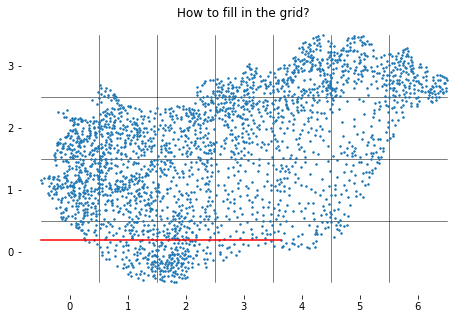

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

#remove frame and set ticks
plt.box(False)
plt.yticks([ la_range[0]+(i+.5)*dla for i in range(shape[0])],range(shape[0]))
plt.xticks([ lo_range[0]+(i+.5)*dlo for i in range(shape[1])],range(shape[1]))
#plot grid
for i in range(1,shape[1]):
    plt.plot([dlo*i+lo_range[0],dlo*i+lo_range[0]],la_range, 'k', linewidth=.5)
for i in range(1,shape[0]):
    plt.plot(lo_range,[dla*i+la_range[0],dla*i+la_range[0]], 'k', linewidth=.5)

plt.plot(long, lat, 'o', markersize=1.5, label='Towns')

#add Szeged
plt.plot([lo_range[0],cities[3][6]],[cities[3][5],cities[3][5]],'r')

plt.title("How to fill in the grid?")
plt.show()



Fill in the grid:

In [121]:
for c in cities[1:]:
    ilat  = int((float(c[5]) - la_range[0]) / dla)
    ilong = int((float(c[6]) - lo_range[0]) / dlo)
    
    if ilat == shape[0]:
        ilat -= 1
    if ilong == shape[1]:
        ilong -= 1
    
    grid[ilat][ilong].append(c)

#print out how many cities we have in each box
for i in range(shape[0]):
    for j in range(shape[1]):
        print("%3d" % len(grid[i][j]), end=" ")
    print()

 50 264 378  82  72  18   0 
422 394 254 130 134  92   0 
280 386 322 304 196 132  58 
  2  24  28 176 356 276 292 


<b>Largest distance</b><br>
* Get largest distance between nonempty boxes (28*27/2 distance calculations)
* Pair cities from the two boxes
* In general, this is most probably the largest distance between two cities (Stop here)
* In order to be really sure one should pair cities in boxes with less then the found distance

In [156]:
# get coordinates of the center of the boxes
# list of lists, each element is [box, latitude, longitude]
boxcoords = [[grid[j][k],(j+.5)*dla+la_range[0],(k+.5)*dlo+lo_range[0]] \
             for k in range(shape[1]) for j in range(shape[0])]

#calculate the distance between
# list of lists, each element is [box1, box2, distance]
boxdists = [(b1[0],b2[0],latlongdist(b1[1],b1[2],b2[1],b2[2])) \
            for b1 in boxcoords for b2 in boxcoords if b1[0] and b2[0]]

#sort by distance and get maximum
boxdists.sort(key= lambda x: x[2], reverse=True)
maxboxdist = boxdists[0]


In [158]:
# calculate distances between cities in boxes furthest away
# list of lists, each element is [city1, city2, distance]
citydists = []
for c1 in maxboxdist[0]:
    for c2 in maxboxdist[1]:
        citydists.append([c1[1],c2[1],latlongdist(c1[5],c1[6],c2[5],c2[6])])

#you could also do this with a list comprehension:
#citydists = [(c1[1],c2[1],latlongdist(c1[5],c1[6],c2[5],c2[6])) \
#             for c1 in maxboxdist[0] for c2 in maxboxdist[1]]

#get maximum distance pair
print(max(citydists,key= lambda x:x[2]))

['Letenye', 'Uszka', 497.53818090877525]


Why didn't we find the correct pair?

(How to plot later today, for now, just run the cell.)

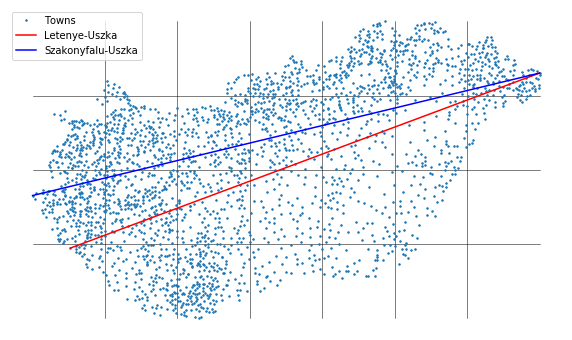

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

#remove frame
plt.box(False)
plt.tick_params(axis='both',which='both', left=False, right=False, bottom=False, top=False, labelbottom=False, labelleft=False)
#plot grid
for i in range(1,shape[1]):
    plt.plot([dlo*i+lo_range[0],dlo*i+lo_range[0]],la_range, 'k', linewidth=.5)
for i in range(1,shape[0]):
    plt.plot(lo_range,[dla*i+la_range[0],dla*i+la_range[0]], 'k', linewidth=.5)

plt.plot(long, lat, 'o', markersize=1.5, label='Towns')

#Letenye-Uszka
la_LU = [c[5] for c in cities if c[1]=='Letenye' or c[1]=='Uszka']
lo_LU = [c[6] for c in cities if c[1]=='Letenye' or c[1]=='Uszka']
plt.plot(lo_LU,la_LU,'r',label="Letenye-Uszka")

#Letenye-Uszka
la_SU = [c[5] for c in cities if c[1]=='Szakonyfalu' or c[1]=='Uszka']
lo_SU = [c[6] for c in cities if c[1]=='Szakonyfalu' or c[1]=='Uszka']
plt.plot(lo_SU,la_SU,'b',label="Szakonyfalu-Uszka")

plt.legend(loc='upper left')

plt.show()



### Exercise
Find smallest distance between cities.

The closest cities are either in the same box or in neighboring boxes. Let's break up this exercise into two smaller steps.

1. Find closest cities that are in the same box

<details><summary><u>Hint.</u></summary>
<p>
    
Do something similar to what we did before:
```python
citydists = []
for c1 in maxboxdist[0]:
    for c2 in maxboxdist[1]:
        citydists.append([c1[1],c2[1],latlongdist(c1[5],c1[6],c2[5],c2[6])])
```
Only instead of select cities from boxes  maxboxdist[0] and maxboxdist[1], select them from the same box.

</p>
</details>

('Szekszárd', 'Hosszúvölgy', 0.22991422061048014)


<details><summary><u>Solution.</u></summary>
<p>
    
```python
citydists = []
for k in range(shape[0]):
    for j in range(shape[1]):
        for c1 in grid[k][j]:
            for c2 in grid[k][j]:
                dist = latlongdist(c1[5],c1[6],c2[5],c2[6])
                #exclude duplicates
                if dist>0:
                    citydists.append((c1[1],c2[1],dist))
                 
mindist = min(citydists, key = lambda x: x[2])
print(mindist)
    
# or in one very long line
print(min([ (c1[1],c2[1], latlongdist(c1[5],c1[6],c2[5],c2[6])) for row in grid for box in row \
    for c1 in box for c2 in box if c1[5]!=c2[5] or c1[6]!=c2[6]], key= lambda x: x[2]))
```
    
</p>
</details>

2. Find closest cities that are in neighboring boxes in directions:
    * west-east
    * north-south
    * northeast-southwest
    
<details><summary><u>Hint.</u></summary>
<p>    
The western neighbor of box <code>grid[j][k]</code> is <code>grid[j][k+1]</code>.
</p>
</details>

('Szekszárd', 'Hosszúvölgy', 0.22991422061048014)


<details><summary><u>Solution.</u></summary>
<p>
    
```python
citydists2 = []
for k in range(shape[0]):
    for j in range(shape[1]):
        # west-east
        if j<shape[1]-1:
            citydists2 += [(c1[1],c2[1],latlongdist(c1[5],c1[6],c2[5],c2[6])) \
             for c1 in grid[k][j] for c2 in grid[k][j+1]]
        # north-south
        if k<shape[0]-1:
            citydists2 += [(c1[1],c2[1],latlongdist(c1[5],c1[6],c2[5],c2[6])) \
             for c1 in grid[k][j] for c2 in grid[k+1][j]]
        # northeast-southwest
        if k<shape[0]-1 and j<shape[1]-1:
            citydists2 += [(c1[1],c2[1],latlongdist(c1[5],c1[6],c2[5],c2[6])) \
             for c1 in grid[k][j] for c2 in grid[k+1][j+1]]

mindist2 = min(citydists+citydists2, key = lambda x: x[2])
print(mindist2)
```
    
</p>
</details>

## Home work!

In separate notebook uploaded to moodle. You will have to investigate how run-time of finding the maximum and minimum distance depends on the resolution of the grid. You can reuse the code from the class.

Submission deadline: **February 20, 3:30 pm**

## Dictionaries

Dictionaries are similar to lists, except that each element is a key-value pair. The syntax for dictionaries is `{key1 : value1, key2 : value2, ...}`:

In [166]:
fruits = {"bananas" : 1,
          "oranges" : 2,
          "apples" : 3,}

print(type(fruits))
print(fruits)

<class 'dict'>
{'bananas': 1, 'oranges': 2, 'apples': 3}


In [ ]:
print("bananas = " + str(fruits["bananas"]))
print("oranges = " + str(fruits["oranges"]))
print("apples  = " + str(fruits["apples"]))

In [ ]:
# change value
fruits["bananas"] = "no bananas"
fruits["oranges"] = 100

# add a new entry
fruits["pineapples"] = "D"

print("bananas = " + str(fruits["bananas"]))
print("oranges = " + str(fruits["oranges"]))
print("apples = " + str(fruits["apples"]))
print("pineapples = " + str(fruits["pineapples"]))

Strings, numbers, and tuples work as keys, and any type can be a value. Other types may or may not work correctly as keys (strings and tuples work cleanly since they are immutable). Looking up a value which is not in the dict throws a `KeyError` -- use `in` to check if the key is in the dict, or use `dict.get(key)` which returns the value or None if the key is not present (or `get(key, not-found)` allows you to specify what value to return in the not-found case).

In [167]:
print(fruits['bananas'])     ## Simple lookup

1


If you try to access something that does not exists in the dictionary, you will get an error:

In [168]:
print(fruits['strawberries'])

KeyError: 'strawberries'

To avoid key errors, you can simply check with an ``if`` that the key is present in the dictionary: 

In [169]:
if 'bananas' in fruits: print(fruits['bananas']) ## Yes, you can also write an if in this way 

if 'strawberries' in fruits: print (fruits['strawberries']) ## and an if-else in this way 
else: print("I don\'t know what a strawberry is")

1
I don't know what a strawberry is


An alternative way to access keys in a dictionary is with the method ``get``. If the key does not exist you get a `None`:

In [170]:
print(fruits.get('bananas'))
print(fruits.get('strawberries')) 

1
None


You can also define a default different from ``None``:

In [171]:
print(fruits.get('strawberries',0))  

0


To iterate over key-value pairs of a dictionary:

In [172]:
for key in fruits: 
    print(key, fruits[key])

bananas 1
oranges 2
apples 3


This iteration is equivalent to iterating over ```fruits.keys()```:

In [ ]:
for key in fruits.keys(): 
    print(key)

In [267]:
type(fruits.keys())

dict_keys

If you want to show the values instead:

In [ ]:
for value in fruits.values():
    print(value)

If you want to iterate through both at the same time, you can use `fruits.items()`

In [ ]:
for key, value in fruits.items():
    print(key + " = " + str(value))

_**Note that the keys are not sorted, nor are listed in the order you added them to the dictionary!**_ If you want to do that, you should sort the keys first

In [ ]:
for key in sorted(fruits.keys()):
    print(key, fruits[key])

In [ ]:
#fruits['bananas']=23
#fruits['pineapples']=45
for value in sorted(fruits.values()):
    print(value)

Dictionary comprehensions

In [ ]:
D = {k:k*k for k in range(3)}
print(D)

In [ ]:
for value in D.values():
    print(value)

### Exercise
Build a dictionary from the cities list. The key should be the accentless cityname (column 2), The value should be the population

<details><summary><u>Hint 1.</u></summary>
<p>

You can start from an empty dictionary and use a <code>for</code> loop to iterate trough <code>cities</code> to populate the dictionary or you can use a dictionary comprehension.

</p>
</details>

<details><summary><u>Hint 2.</u></summary>
<p>

The first element of <code>cities</code> is a header, exclude it by slicing as <code>cities[1:]</code>.

</p>
</details>

<details><summary><u>Solution.</u></summary>
<p>
    
```python
cdict = {c[2]:int(c[3]) for c in cities[1:]}
#test it
print(cdict['Szeged'])
```
    
</p>
</details>

### Exercise
Build a dictionary containing dictionaries from the cities list. The key should be the accentless cityname (column 2), The value should be a dictionary, with 'population' the population and 'area' the size in km$^2$

<details><summary><u>Solution.</u></summary>
<p>
    
```python
cdict2 = {c[2]:{"population":int(c[3]), "area":float(c[4])} for c in cities[1:]}
# test it
print(cdict2['Szeged'])
```
    
</p>
</details>

## NumPy

From numpy's documentation:

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

 * a powerful N-dimensional array object
 * sophisticated (broadcasting) functions
 * tools for integrating C/C++ and Fortran code
 * useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.


In [173]:
import numpy as np
a = np.arange(10)
print(a)
print(type(a))

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>


In [174]:
b = [1,2,3]
print(type(b),b,b[0])
a = np.array(b)
print(type(a),a,a[0])

<class 'list'> [1, 2, 3] 1
<class 'numpy.ndarray'> [1 2 3] 1


### Shape and dimension

In [175]:
a = np.array([1,2,3,4,5,6])
b = np.array([[1,2,3],[4,5,6]])
print(np.ndim(a),np.ndim(b))
print(a.shape, b.shape)
c = a.reshape(2,3)
print(c)
print(np.ndim(c), c.shape)

1 2
(6,) (2, 3)
[[1 2 3]
 [4 5 6]]
2 (2, 3)


In [176]:
# The shape of arrays can change, but the total number of items cannot!

print(a.reshape(3, 2))
print(a.reshape(2,1,3))
print(a.reshape(2, 4))

[[1 2]
 [3 4]
 [5 6]]
[[[1 2 3]]

 [[4 5 6]]]


ValueError: cannot reshape array of size 6 into shape (2,4)

### Data type

In [179]:
a = np.zeros((2,3),dtype=int)
a[1,2]=3.5
b = np.zeros((2,3),dtype=float)
b[1,2]=3.5
print("a =",a)
print("b =",b)

a = [[0 0 0]
 [0 0 3]]
b = [[0.  0.  0. ]
 [0.  0.  3.5]]


### Arrays are mutable

In [285]:
a = np.ones(5)
c = a
c[0] = 9 #changing c changes a, just like in the case of lists
print("a=", a)
print()

d = np.copy(a) #makes a new copy of the array in the memory 
d[0] = 0 #changing d does not change a
print("a=",a,"\nd=",d)
print()

# array operations create new arrays
e = 2*a
e[0] = 10
print("a=",a,"\ne=",e)


a= [9. 1. 1. 1. 1.]

a= [9. 1. 1. 1. 1.] 
d= [0. 1. 1. 1. 1.]

a= [9. 1. 1. 1. 1.] 
e= [10.  2.  2.  2.  2.]


Sidenote:
   * Slicing a list makes a new copy
   * Slicing a numpy array makes a new view 

In [281]:
#lists (remeber the quiz question from last week?)
L  = [1,2,3]
L2 = L[:]
L2[0]=12
print("L=",L,"  L2=",L2)

#np arrays
A = np.array([1,2,3])
A2= A[:]
A2[0]=12
print("A=",A," A2=",A2)


L= [1, 2, 3]   L2= [12, 2, 3]
A= [12  2  3]  A2= [12  2  3]


### More on array operations
What if the two arrays have different shape?

In [215]:
a = np.ones((3,3))
b = np.array([1.,0.,1.])
print(a, b)
print("2 * a =\n", 2 * a)
print("a + 1 =\n", a + 1)
print("a + b =\n", a + b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] [1. 0. 1.]
2 * a =
 [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
a + 1 =
 [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
a + b =
 [[2. 1. 2.]
 [2. 1. 2.]
 [2. 1. 2.]]


### Exercise
Play around with the previous example (you may want to make a copy) by changing the size of the arrays to see what is allowed

<details><summary><u>Possible things to try</u></summary>
<p>
    
```python
a = np.ones((3,3))
c = np.array([[1],[0],[1]])
print(a+c)

d = np.arange(4).reshape(2,2)
print(a+d)
```
    
</p>
</details>

In [269]:
a = np.arange(9).reshape((3,3))
b = np.array([1,0,1])
print(a)
print(a.transpose())
print("a * a=", a * a)            # element-wise; not a dot product!
print("a.dot(a) = ", a.dot(a))    # dot product
print("a @ a", a @ a)             # dot product (since Python 3)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 3 6]
 [1 4 7]
 [2 5 8]]
a * a= [[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]
a.dot(a) =  [[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]
a @ a [[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]


In [47]:
a = np.arange(9).reshape((3,3))
print("a =", a)
print("sin =", np.sin(a))
print("x**3 =", np.power(a,3))
print("sum =", np.sum(a))
print("mean =", np.mean(a))
print("std =", np.std(a))
print("size =", np.size(a))
print("min =", np.min(a))

a = [[0 1 2]
 [3 4 5]
 [6 7 8]]
sin = [[ 0.          0.84147098  0.90929743]
 [ 0.14112001 -0.7568025  -0.95892427]
 [-0.2794155   0.6569866   0.98935825]]
x**3 = [[  0   1   8]
 [ 27  64 125]
 [216 343 512]]
sum = 36
mean = 4.0
std = 2.581988897471611
size = 9
min = 0



### Loops and array operations (important!)

Array operations off-load Python loops to compiled C code, leading to large performance improvements.

Consider:


In [181]:
import timeit
import math

x = np.arange(1000000)

def f(x):
    y = np.zeros(x.shape)
    for i in range(len(x)):
        y[i] = math.cos(x[i]) + x[i] ** 2
    return y

print(f(x))
print(np.cos(x) + x ** 2)  # array expression  

print(timeit.timeit("f(x)", number=1, globals=globals()))
print(timeit.timeit("np.cos(x) + x ** 2", number=1, globals=globals()))

[1.00000000e+00 1.54030231e+00 3.58385316e+00 ... 9.99994000e+11
 9.99996000e+11 9.99998000e+11]
[1.00000000e+00 1.54030231e+00 3.58385316e+00 ... 9.99994000e+11
 9.99996000e+11 9.99998000e+11]
3.1065085110021755
0.034725480974884704


### Exercise

Write a function using numpy arrays that does the same calculation as the `f(n)` defined below.

Bonus: compare their runtime.

<details><summary><u>Hint.</u></summary>
<p>
    
Use `np.arange()` and `np.sum()` functions.
    
</p>
</details>

<details><summary><u>Solution.</u></summary>
<p>
    
```python
def g(n):
    a = np.arange(1,n)
    x = np.sum(np.log(a))
    print(x)
    return

print(timeit.timeit(lambda :g(10000000), number=1))
```
    
</p>
</details>

### Exercise

Average city distance from Budapest?

Old way of doing this:

In [ ]:
old_avgdist = sum([latlongdist(lat[0],long[0],lat[i],long[i]) for i in range(1,len(lat))])/(len(lat)-1)
print(old_avgdist)

Now calculate the average distance using numpy arrays!

To get you stared:

In [259]:
import math
def np_latlongdist(lat1,long1,lat2,long2):
    rlat1 = np.radians(lat1)
    rlat2 = np.radians(lat2)
    rlong1 = np.radians(long1)
    rlong2 = np.radians(long2)
    dlat = rlat2 - rlat1
    dlong = rlong2 - rlong1
    a = np.sin(dlat / 2)**2 + np.cos(rlat1) * np.cos(rlat2) * np.sin(dlong / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return 6371.0 * c

np_lat = np.array(lat)
np_long  = np.array(long)

<details><summary><u>Hint.</u></summary>
<p>
    
When calling the `np_latlongdist(lat1,long1,lat2,long2)` function `lat1` and `long1` should be the coordinates of Budapest; `lat2` and `long2` should be an array of the coordinates of the rest of the cities. 
    
</p>
</details>

139.03475796444178
139.03475796444164


<details><summary><u>Solution.</u></summary>
<p>
    
```python
avgdist = np.mean(np_latlongdist(np_lat[0],np_long[0],np_lat[1:],np_long[1:]))
print(avgdist)

#old way
old_avgdist = sum([latlongdist(lat[0],long[0],lat[i],long[i]) for i in range(1,len(lat))])/(len(lat)-1)
print(old_avgdist)
```
    
</p>
</details>

Let's measure their runtime again!

In [260]:
%timeit np.mean(np_latlongdist(np_lat[0],np_long[0],np_lat[1:],np_long[1:]))

248 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [261]:
%timeit sum([latlongdist(lat[0],long[0],lat[i],long[i]) for i in range(1,len(lat))])/(len(lat)-1)

4.35 ms ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### (Pseudo-)Random numbers

Pseudo-random number generators (PRNG) are deterministic sequences of numbers, that behave very closely to random numbers.

* seed: PRNG with the same seed map to exactly same sequence
* np.random.random -> uniform random number from 0 to 1

In [182]:
np.random.seed(42)
a = np.random.random(10)
print(a)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


In [183]:
a = np.random.random(10)
print(a)

[0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
 0.30424224 0.52475643 0.43194502 0.29122914]


### Flip a coin with probability p

In [184]:
N = 10
p = 0.2
a = np.random.random(N)
for i in range(N):
    if a[i] < p:
        print("Head")
    else:
        print("Tails")
        
# or better:
print(a < p)

Tails
Head
Tails
Tails
Tails
Tails
Head
Tails
Tails
Head
[False  True False False False False  True False False  True]


In [185]:
a = np.random.random((3,3))
print(a)

[[0.60754485 0.17052412 0.06505159]
 [0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303]]


In [204]:
print(np.random.randint(0, 10, size=10))
print(np.random.normal(1, 2, size=(2,2)))
print(np.random.normal(loc=1, scale=2, size=(2,2)))
#help(np.random.normal)

[8 6 8 7 0 7 7 2 0 7]
[[ 2.78866466  2.50999559]
 [ 0.58566822 -0.24695479]]
[[-2.01630658  3.19929395]
 [ 0.64453576  0.17923338]]


### Choose values

In [44]:
print(np.random.choice(5, 10))
print(np.random.choice(5, 3, replace=False))
print(np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0]))
c = ["Budapest", "Pécs", "Debrecen", "Miskolc"]
print(np.random.choice(c,1))

[3 0 4 4 1 4 1 0 3 3]
[1 2 4]
[3 0 3 3 2 0 3 3 3 3]
['Budapest']


### Mask out elements: Indexing via boolean arrays

In [33]:
a = np.random.random(6)
mask = np.zeros(6,dtype=bool)
mask[0:2] = True
print("a =", a)
print("mask =", mask)
print("a[mask] =", a[mask])
print("a[a > .3] =", a[a > .3])
a[a > .3] = -1
print(a)

a = [0.00706631 0.02306243 0.52477466 0.39986097 0.04666566 0.97375552]
mask = [ True  True False False False False]
a[mask] = [0.00706631 0.02306243]
a[a > .3] = [0.52477466 0.39986097 0.97375552]
[ 0.00706631  0.02306243 -1.         -1.          0.04666566 -1.        ]


### Exercise 
* Count the number of elements which are less than 0.5
* Replace all elements which are less than 0.5 with new random number

[0.83319491 0.17336465 0.39106061 0.18223609 0.75536141 0.42515587]
4
[0.83319491 0.20794166 0.56770033 0.03131329 0.75536141 0.84228477]


<details><summary><u>Solution.</u></summary>
<p>
    
```python
a = np.random.random(6)
print(a)
print(len(a[a<.5]))
a[a<.5] = np.random.random(len(a[a<.5]))
print(a)
```
    
</p>
</details>

### Exercise

Write a function using numpy arrays that does the same calculation as the following:


In [225]:
def f(n):
    x = 0.
    for i in range(n):
        if i%2==0:
            x+= i*i
        else:
            x-= i*i
    print(x)
    return

print(timeit.timeit(lambda :f(10000000), number=1))




-49999995000000.0
1.4229449430131353
-49999995000000.0
0.3226305930002127


<details><summary><u>Solution.</u></summary>
<p>
    
```python
def g(n):
    a = np.arange(n)
    b = np.ones(n)
    b[a%2==1]*=-1
    print(np.sum(a*a*b))
    return

print(timeit.timeit(lambda :g(10000000), number=1))
```
    
</p>
</details>

### Ranges

In [61]:
print(np.arange(10))
print(np.arange(5, 7, 0.1))
print(np.linspace(5, 7, 9))
print(np.logspace(0, 2, 10))
print(np.logspace(np.log10(0.3), np.log10(28), 10))

[0 1 2 3 4 5 6 7 8 9]
[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7
 6.8 6.9]
[5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.  ]
[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]
[ 0.3         0.49660859  0.82206698  1.36081842  2.25264707  3.72894631
  6.17275594 10.21814546 16.91472947 28.        ]


### Histogram

In [62]:
a = np.random.random(10)
h = np.histogram(a, bins=3)
print(a)
print(h)

[0.44975413 0.39515024 0.92665887 0.727272   0.32654077 0.57044397
 0.52083426 0.96117202 0.84453385 0.74732011]
(array([4, 3, 3]), array([0.32654077, 0.53808452, 0.74962827, 0.96117202]))


In [63]:
a = np.random.random(10000)
h = np.histogram(a, bins=[0, 0.5, 1.0])
print(h[0])

[4941 5059]


### Exercise

Create a histogram of normally distributed random numbers with 20 bins, use `np.linspace()` to define the bins. 

<details><summary><u>Hint.</u></summary>
<p>

Check for the smallest and the largest value for the leftmost and rightmost edge of the bins.
    
</p>
</details>

<details><summary><u>Solution.</u></summary>
<p>
    
```python
a = np.random.random(10000)
h = np.histogram(a, bins=np.linspace(a.min(),a.max(),21))
print(len(h[0]))
print(h[0])
```
    
</p>
</details>

## Plotting with `matplotlib`

The plotting tool most people default to. Very flexible, but documentation can be daunting.

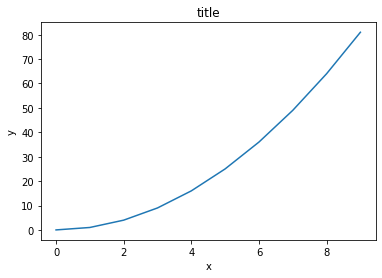

In [286]:
import matplotlib.pyplot as plt

x = np.arange(10)
y = x**2

plt.figure()

plt.plot(x, y, '-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('title')

plt.show()

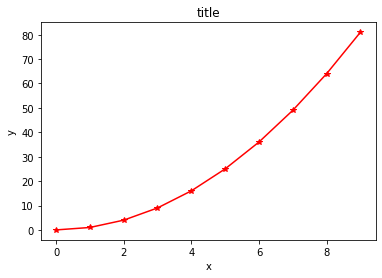

In [287]:
plt.figure()
plt.plot(x, y, '*-', color="r")
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

### Format and other options
use: <a href="https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html">Mathplotlib plot help</a>

### Exercise
* Plot a sin function from -6 to +6
* Plot a sin and a cos function together

<details><summary><u>Hint.</u></summary>
<p>

To plot two things call the `plt.plot()` function twice consecutively, e.g.
```python
plt.plot(x,y1)
plt.plot(x,y2)
```
    
</p>
</details>

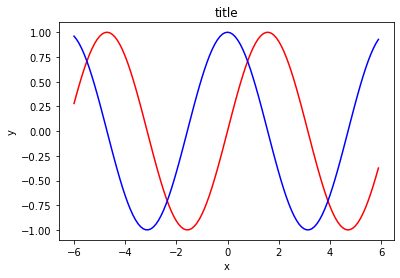

<details><summary><u>Solution.</u></summary>
<p>
    
```python
plt.figure()
x=np.arange(-6,6,.1)
plt.plot(x, np.sin(x), '-', color="r")
plt.plot(x, np.cos(x), '-', color="b")
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()
```
    
</p>
</details>

### Plotting histograms

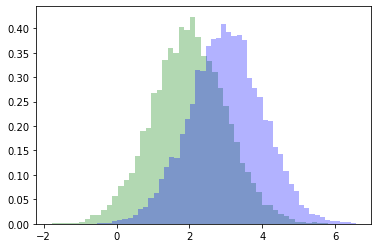

In [70]:
x = np.random.normal(2,1,10000)
plt.hist(x, 50, density=True, facecolor='g', alpha=.3)
y = np.random.normal(3,1,10000)
plt.hist(y, 50, density=True, facecolor='b', alpha=.3)
plt.show()

### Subplots

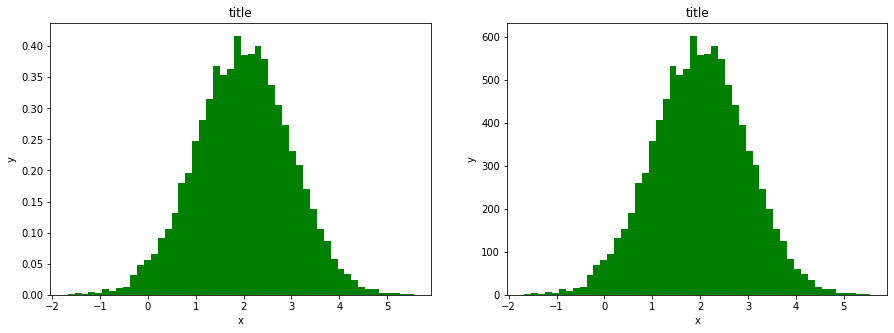

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
x = np.random.normal(2,1,10000)
true_or_false = True
for ax in axes:
    ax.hist(x, 50, density=true_or_false, facecolor='g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    true_or_false ^= True



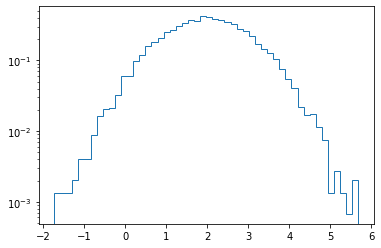

In [72]:
x = np.random.normal(2,1,10000)
plt.hist(x, 50, density=1, histtype='step')
plt.yscale('log')
plt.show()

### Exercise
* Create a random number series of 0's and 1's
* Count the length of the successive 1's (e.g. 0111010 the first sequence has a length of 3 the second has a length of 1)
* Plot a histogram from these values

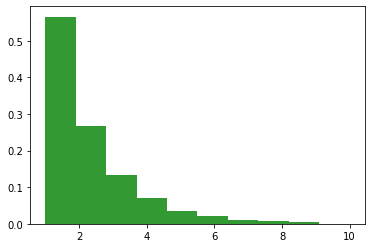

<details><summary><u>Solution.</u></summary>
<p>
    
```python
a=np.random.randint(0,2,10000)
#print(a)
counts = []
count = 0
for x in a:
    if x==1:
        count+=1
    elif count>0:
        counts.append(count)
        count=0
        
plt.hist(counts, max(counts), density=True, facecolor='g', alpha=.8)
x=np.arange(1,max(counts))
plt.show()
```
    
</p>
</details>

### Curve fitting

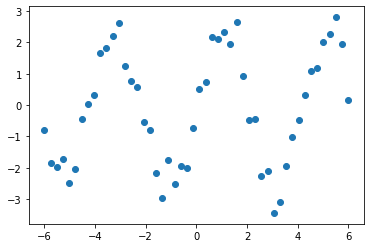

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Seed the random number generator for reproducibility
np.random.seed(42)

x_data = np.linspace(-6, 6, num=50)
y_data = 2.5 * np.sin(1.5 * x_data) + np.random.normal(size=50) / 2

# And plot it
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.show()

In [94]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

[2.41239813 1.49100329]


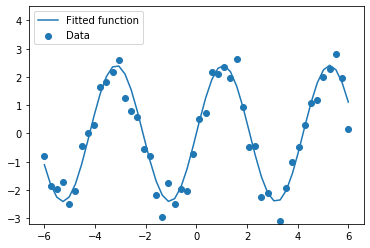

In [95]:
plt.figure()
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='upper left')
axes = plt.gca()
axes.set_ylim([-3.2,4.5])
plt.show()

### Exercise
* Generate a series of points from a noisy parabola model
$$ y = a x^2 + bx + \eta $$
where $\eta$ is random, normal-distributed variable with mean zero and variance one.
* From the data you generate, use the `curve_fit` function to obtain an estimate of the $a$ and $b$ parameters.
* Plot the function you fitted over the data.


[ 0.99657076 -2.0483195 ]


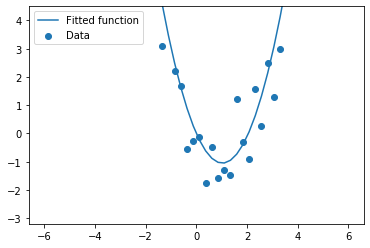

<details><summary><u>Solution.</u></summary>
<p>
    
```python
# Seed the random number generator for reproducibility
np.random.seed(42)

x_data = np.linspace(-6, 6, num=50)
a=1
b=-2
y_data = a * x_data**2. + b*x_data + np.random.normal(size=50)

def test_func(x, a, b):
    return a * x**2. + b*x_data

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

plt.figure()
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='upper left')
axes = plt.gca()
axes.set_ylim([-3.2,4.5])
plt.show()
```
    
</p>
</details>